## Test SiameseNet Data Loader

#### Load dataloader

In [1]:
from siamese_net.data_loader import SiameseImageLoader
dataset_path = '/home/rauf/datasets/road_signs/road_signs_separated/'
input_shape=(48, 48, 3)
batch_size = 8

loader = SiameseImageLoader(dataset_path, input_shape=input_shape)

### Test semi hard mining process

In [2]:
from siamese_net.model import SiameseNet
model = SiameseNet('configs/road_signs_simple2_merged_dataset.yml')
data, targets = loader.get_batch_triplets_mining(model.base_model,4,4)

Using TensorFlow backend.
W0905 16:23:01.219142 140073823041280 deprecation_wrapper.py:119] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 16:23:01.220065 140073823041280 deprecation_wrapper.py:119] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 16:23:01.224671 140073823041280 deprecation_wrapper.py:119] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 16:23:01.252171 140073823041280 deprecation_wrapper.py:119] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/keras/backen

Base model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        12

#### Test pairs dataloader

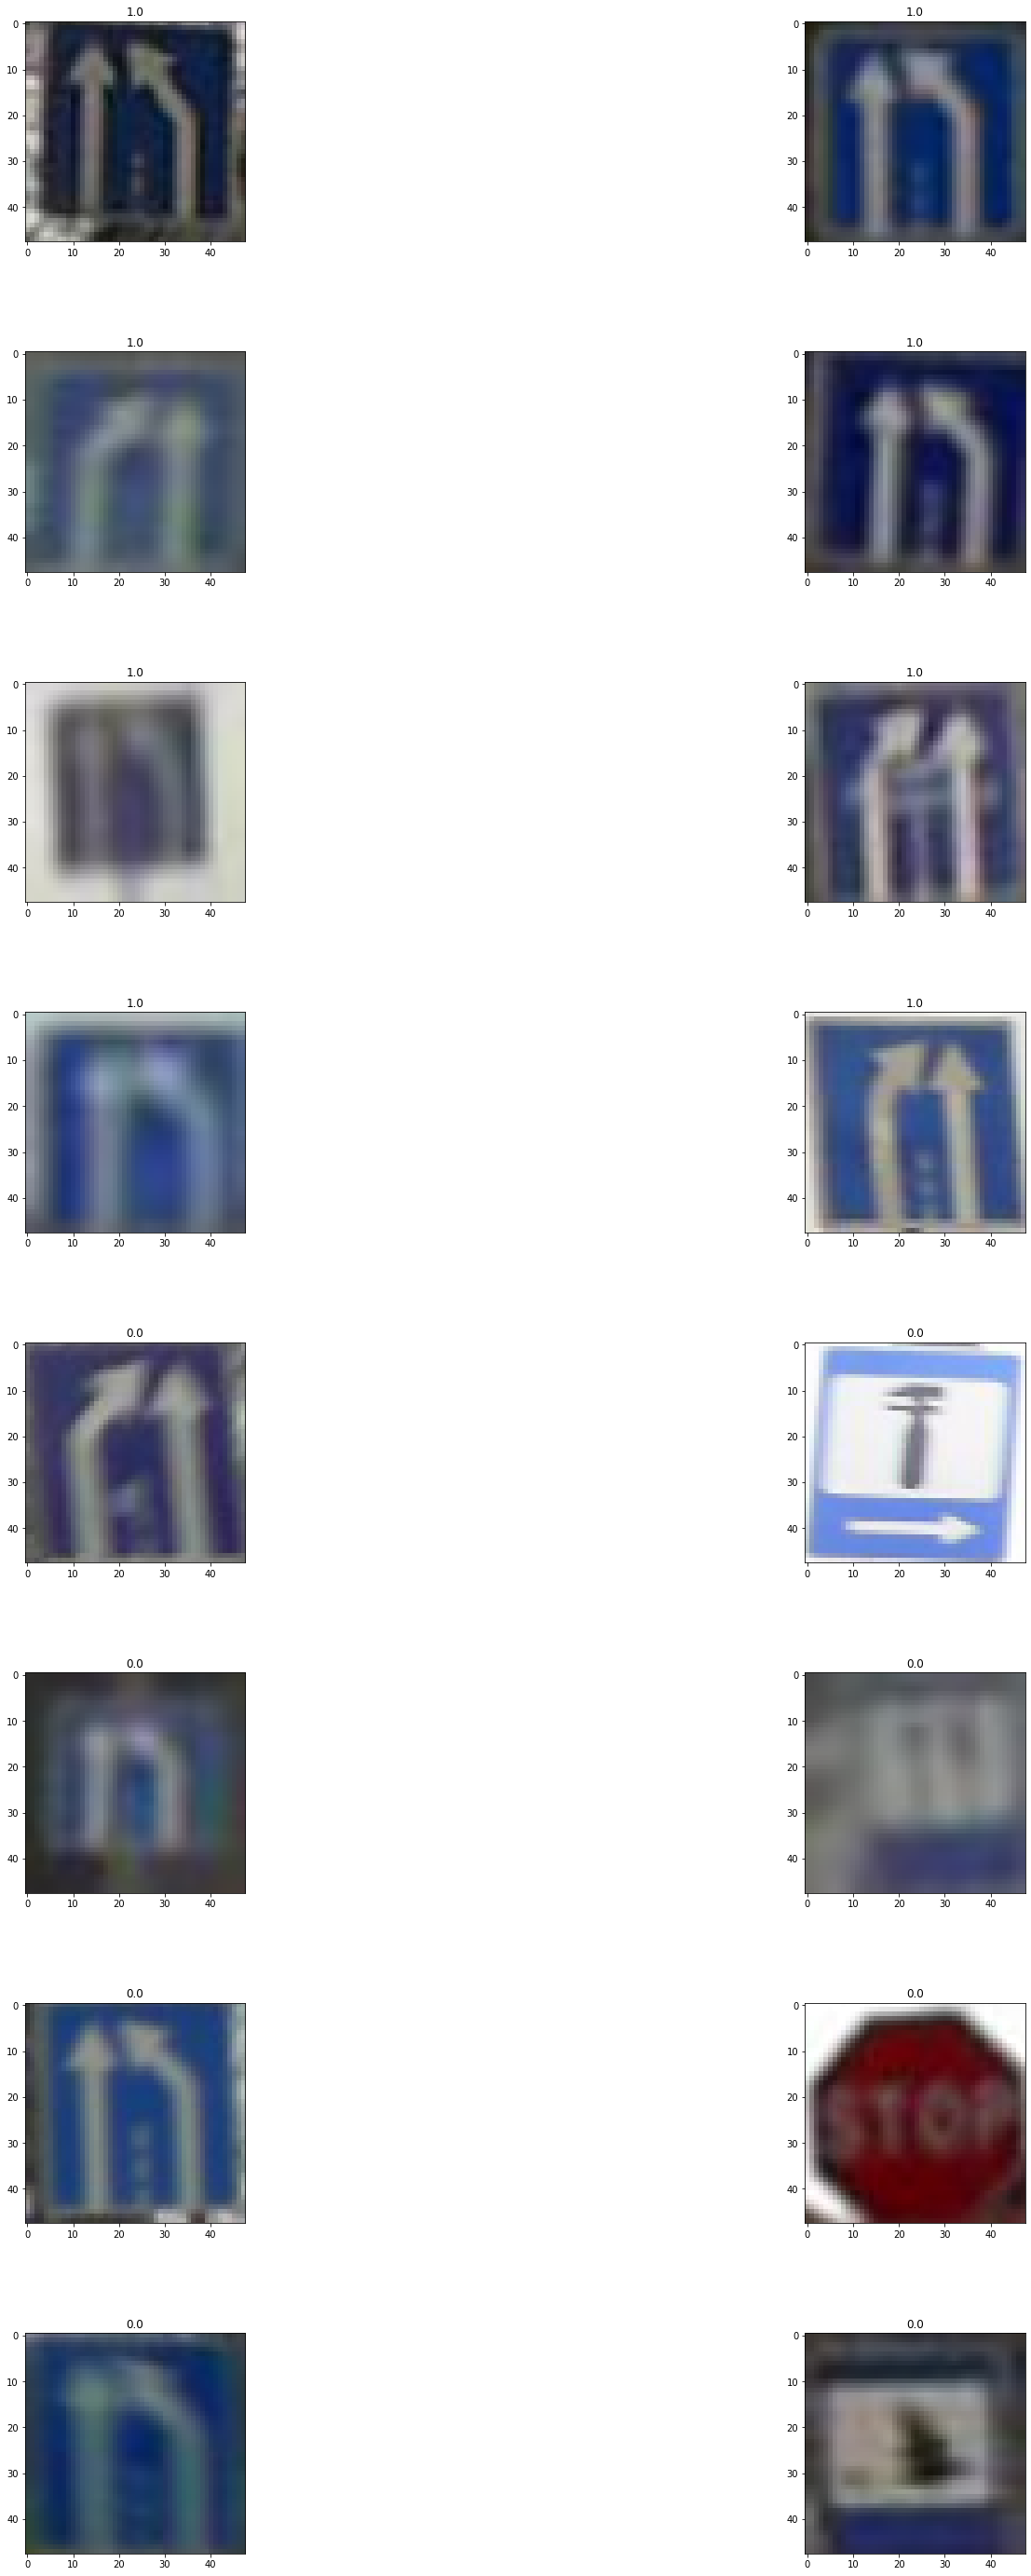

In [3]:
data, targets = loader.get_batch_pairs(batch_size=8)
loader.plot_batch(data, targets)

#### Test triplets dataloader

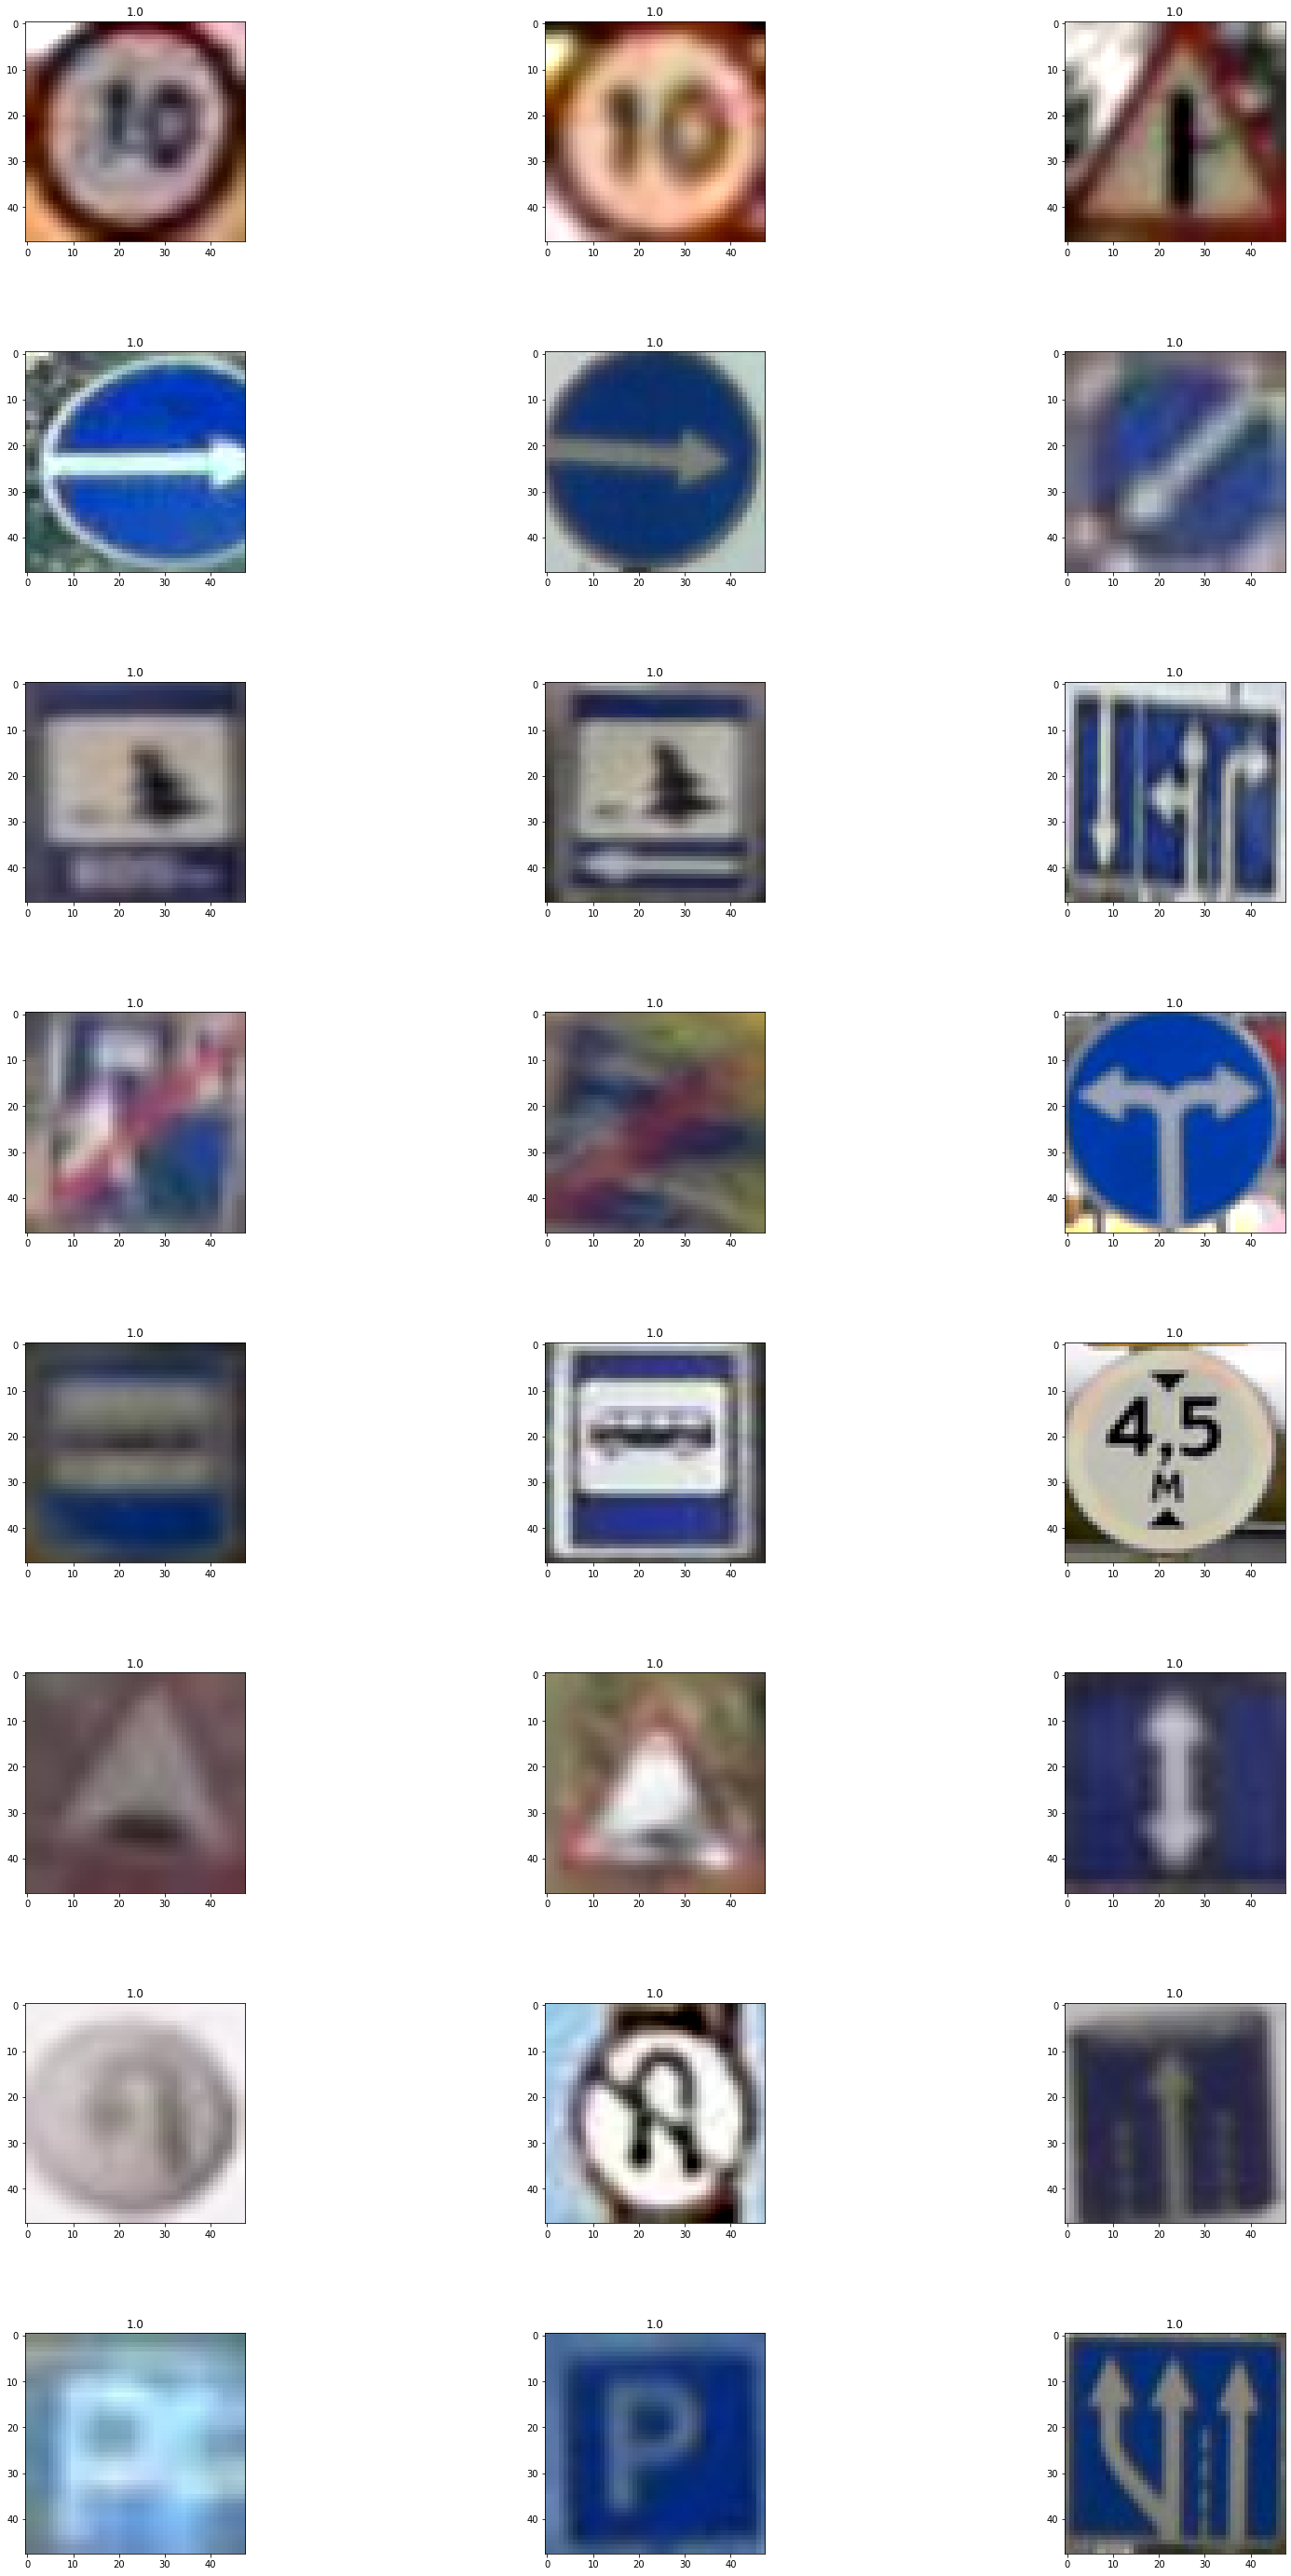

In [7]:
data, targets = loader.get_batch_triplets(batch_size=8)
loader.plot_batch(data, targets)

#### Test triplets dataloader with negative mining techniques

In [ ]:
data, targets = loader.get_batch_triplets_mining(model.base_model,3,3)
loader.plot_batch(data, targets)

(8, 48, 48, 3)
(8, 48, 48, 3)
(8, 48, 48, 3)


## Test trained network

#### Load network

In [2]:
from siamese_net.model import SiameseNet
import time


model = SiameseNet('configs/road_signs_simple2_merged_dataset.yml')
model.load_model('weights/road_signs/best_model_simple2_merged.h5')
model.load_encodings('encodings/road_signs/encodings_simple2_merged.pkl')

Using TensorFlow backend.
W0905 11:45:55.815882 140380799379200 deprecation_wrapper.py:119] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 11:45:55.894730 140380799379200 deprecation_wrapper.py:119] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 11:45:55.900861 140380799379200 deprecation_wrapper.py:119] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 11:45:56.013506 140380799379200 deprecation_wrapper.py:119] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/keras/backen

Base model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        12

W0905 11:46:18.602007 140380799379200 deprecation.py:323] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Test model on a single image

In [ ]:
import matplotlib.pyplot as plt 
img_path = '/home/rauf/datasets/road_signs/road_signs_separated/val/7_5/rtsd-r3_train_068022.png'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(img)
plt.show()

start = time.time()
prediction = model.predict(img_path)
end = time.time()
print(prediction)
print(end - start)

#### Calculate model accuracy on validation set

In [ ]:
model_accuracy = model.calculate_prediction_accuracy()
print('Model accuracy on validation set: {}'.format(model_accuracy))

#### Plot t-SNE

In [ ]:
from siamese_net.utils import plot_tsne_interactive

plot_tsne_interactive(encodings_path='{}encodings.pkl'.format(model.encodings_path))

#### Generate submission file

In [ ]:
import pandas as pd
import os

d = {'id':[],
     'label':[]}
for root, dirs, files in os.walk('../dataset/test/'):
    for f in files:
        if f.endswith('.jpg') or f.endswith('.png'):
            prediction = model.predict('../dataset/test/{}'.format(f))
            id_num = int(f.split('.')[0])
            d['id'].append(id_num)
            d['label'].append(prediction)

df = pd.DataFrame(data=d)
df.to_csv('sub.csv', index=False)